# Logistic regression

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# !pip install -q mlxtend

## Data

In [3]:
x, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [4]:
x.shape

(200, 2)

## Train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
x_train.shape

(160, 2)

## Normalization

In [7]:
scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)

## Model with GridSearchCV

In [12]:
param_grid = {'C': [0.01, 0.1, 0.2, 1, 5]}

model = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid)
model.fit(x_train_scaled, y_train)
best_clf = model.best_estimator_

In [13]:
best_clf

LogisticRegression(C=0.1)

## Evaluation

In [14]:
y_pred = best_clf.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.5f}')

Accuracy: 0.85000


## Plot the decision boundary

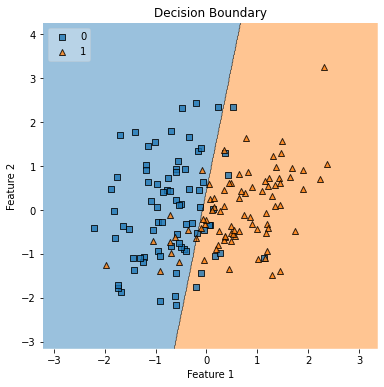

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_regions(x_train_scaled, y_train, clf=best_clf, legend=2, ax=ax)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundary")
plt.show()